
longitude
A measure of how far west a house is; a higher value is farther west

latitude
A measure of how far north a house is; a higher value is farther north

housing_median_age
Median age of a house within a block; a lower number is a
longitude A measure of how far west a house is; a higher value is farther west

latitude A measure of how far north a house is; a higher value is farther north

housing_median_age Median age of a house within a block; a lower number is a newer building

total_rooms Total number of rooms within a block

total_bedrooms Total number of bedrooms within a block

population Total number of people residing within a block

households Total number of households, a group of people residing within a home unit, for a block

median_income Median income for households within a block of houses (measured in tens of thousands of US Dollars)

ocean_proximity The house has a Ocean view or not.

median_house_value Median house value for households within a block (measured in US Dollars)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/housing.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.duplicated().sum()

0

### missing values in total_bedrooms and ocean_proximity need to be encoded
####since they are small so drop execess total_bedrooms that have null values

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

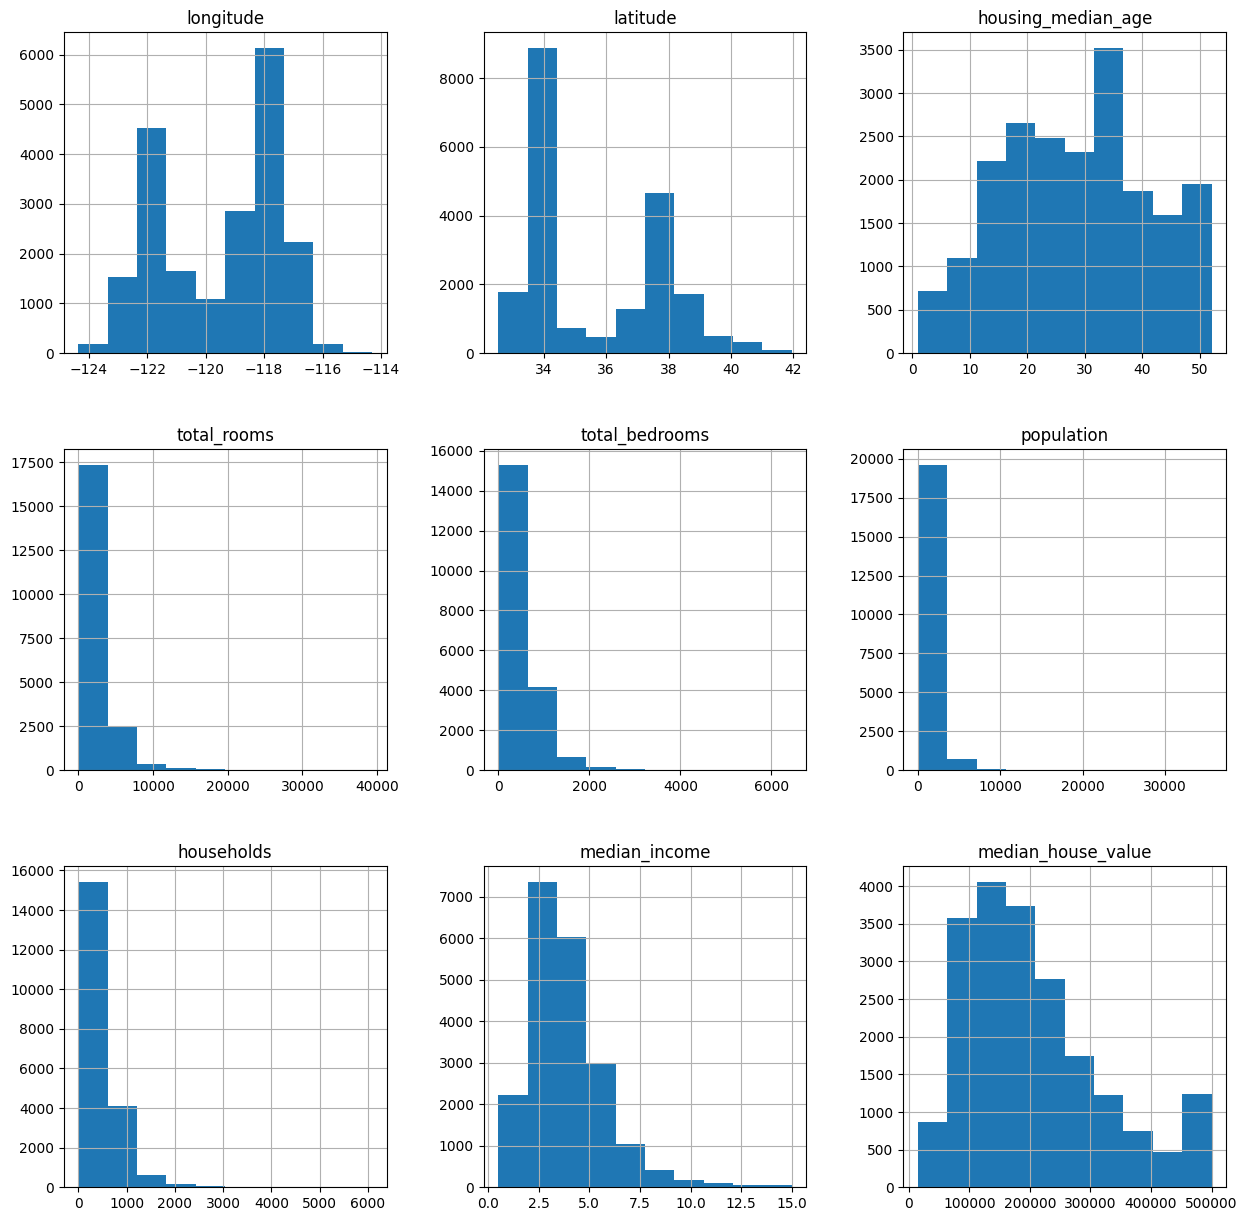

In [ ]:
df.hist(figsize =(15 , 15))

## deduced that it is right skewed so can be changed by log

In [ ]:
sns.heatmap(df.corr() , annot = True)

ValueError: could not convert string to float: 'NEAR BAY'

### deduced that correlation between med_income and med house val is high

In [ ]:
df['total_rooms'] = np.log(df['total_rooms'] +1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] +1)
df['population'] = np.log(df['population'] +1)
df['total_rooms'] = np.log(df['total_rooms'] +1)
df['households'] = np.log(df['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

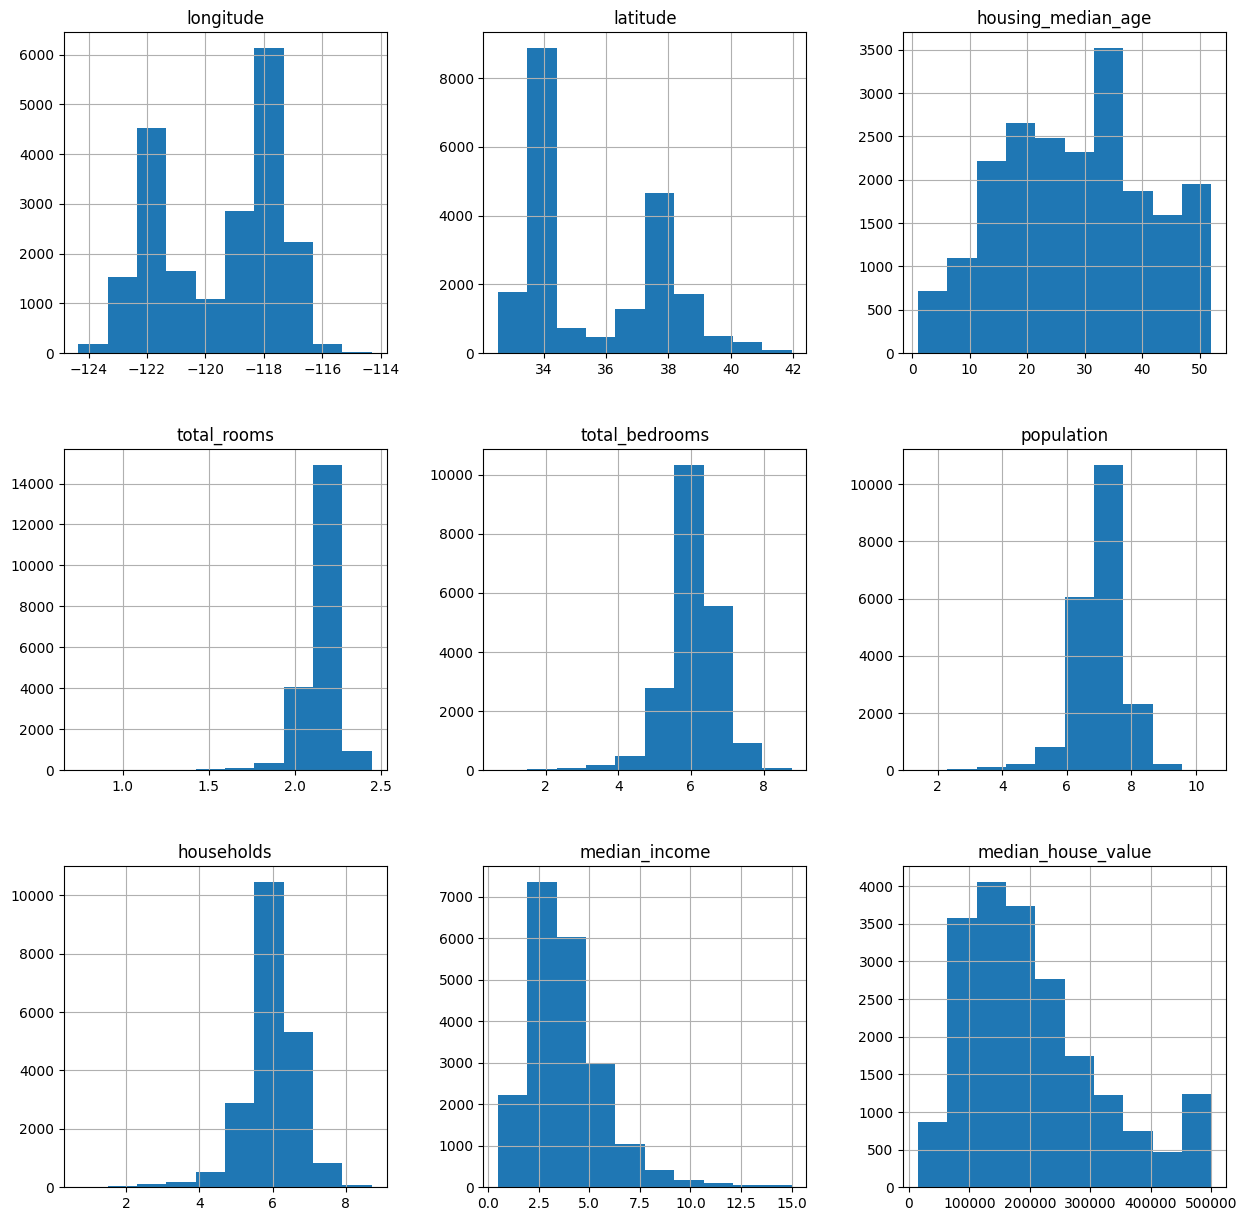

In [ ]:
df.hist(figsize =(15 , 15))

#### skewness is solved so distrubution became better

In [ ]:
df.shape

(20433, 10)

In [ ]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [ ]:
df=df.join(pd.get_dummies(df.ocean_proximity)).drop(['ocean_proximity'],axis = 1)

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,2.051692,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,2.289282,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,2.115250,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,2.098104,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,2.127649,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,2.130394,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,2.021312,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2.165723,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,2.143457,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False


### so now see the corr of new values

<Axes: >

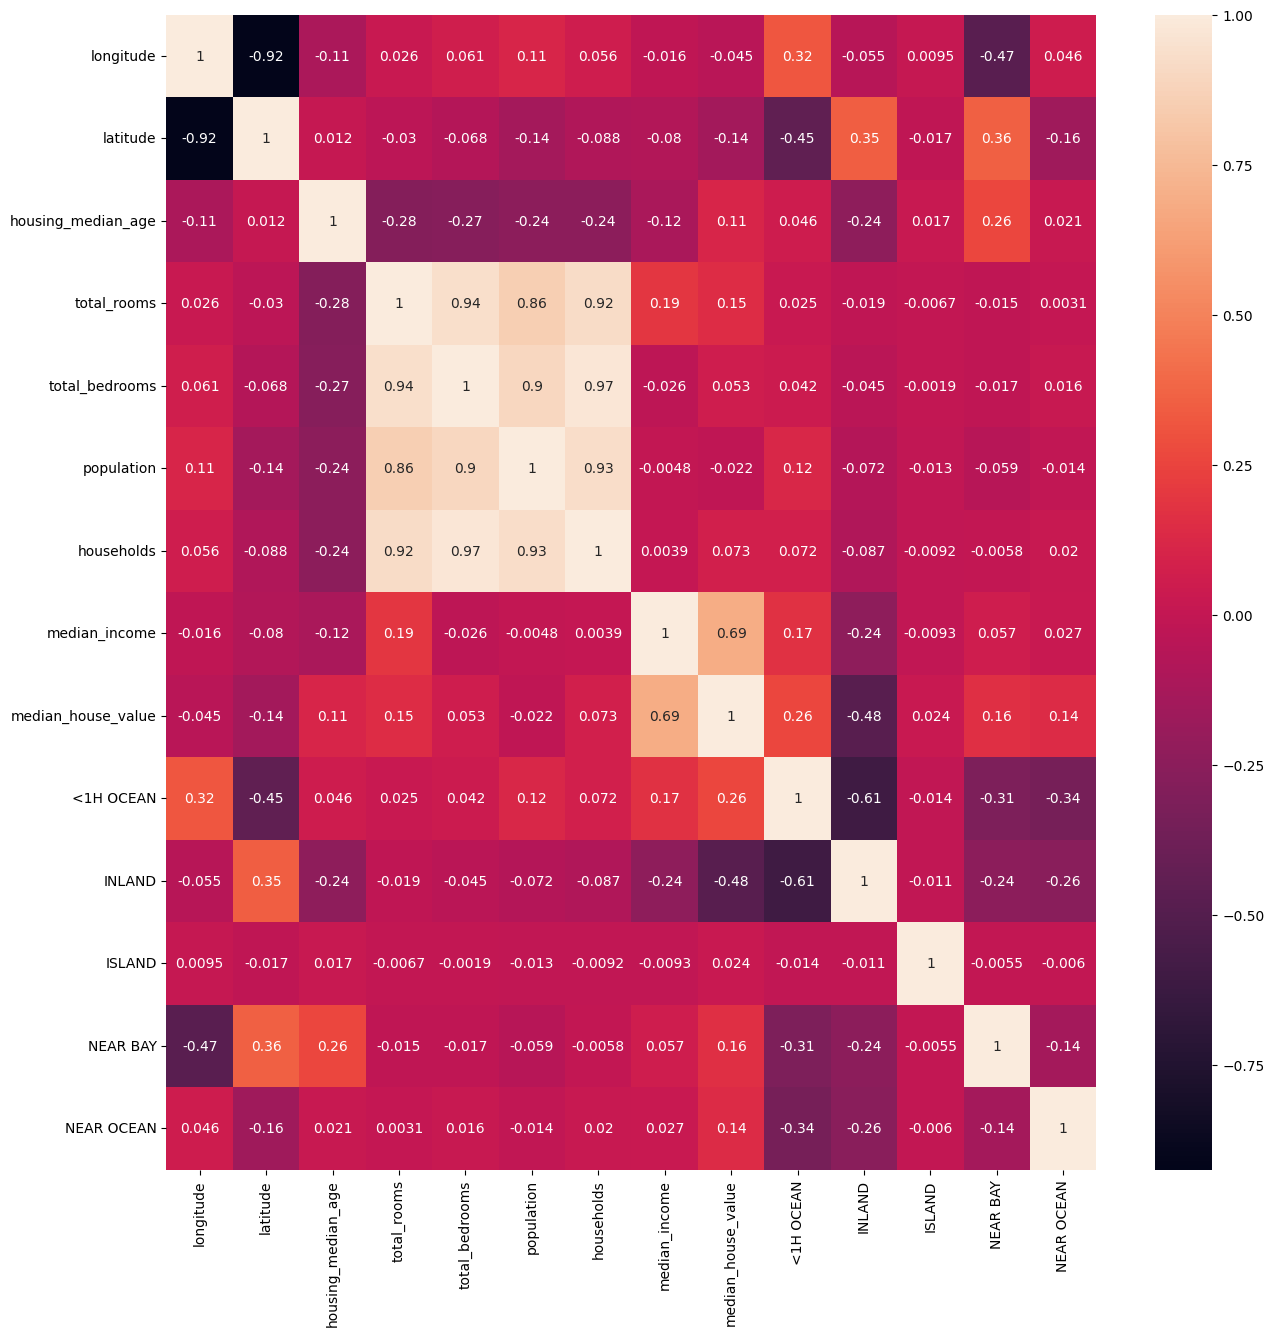

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr() , annot = True)

# duduced asc : inland -ve , <1h higher

In [ ]:
#features
#visualization of cordinates to see prox

<Axes: xlabel='latitude', ylabel='longitude'>

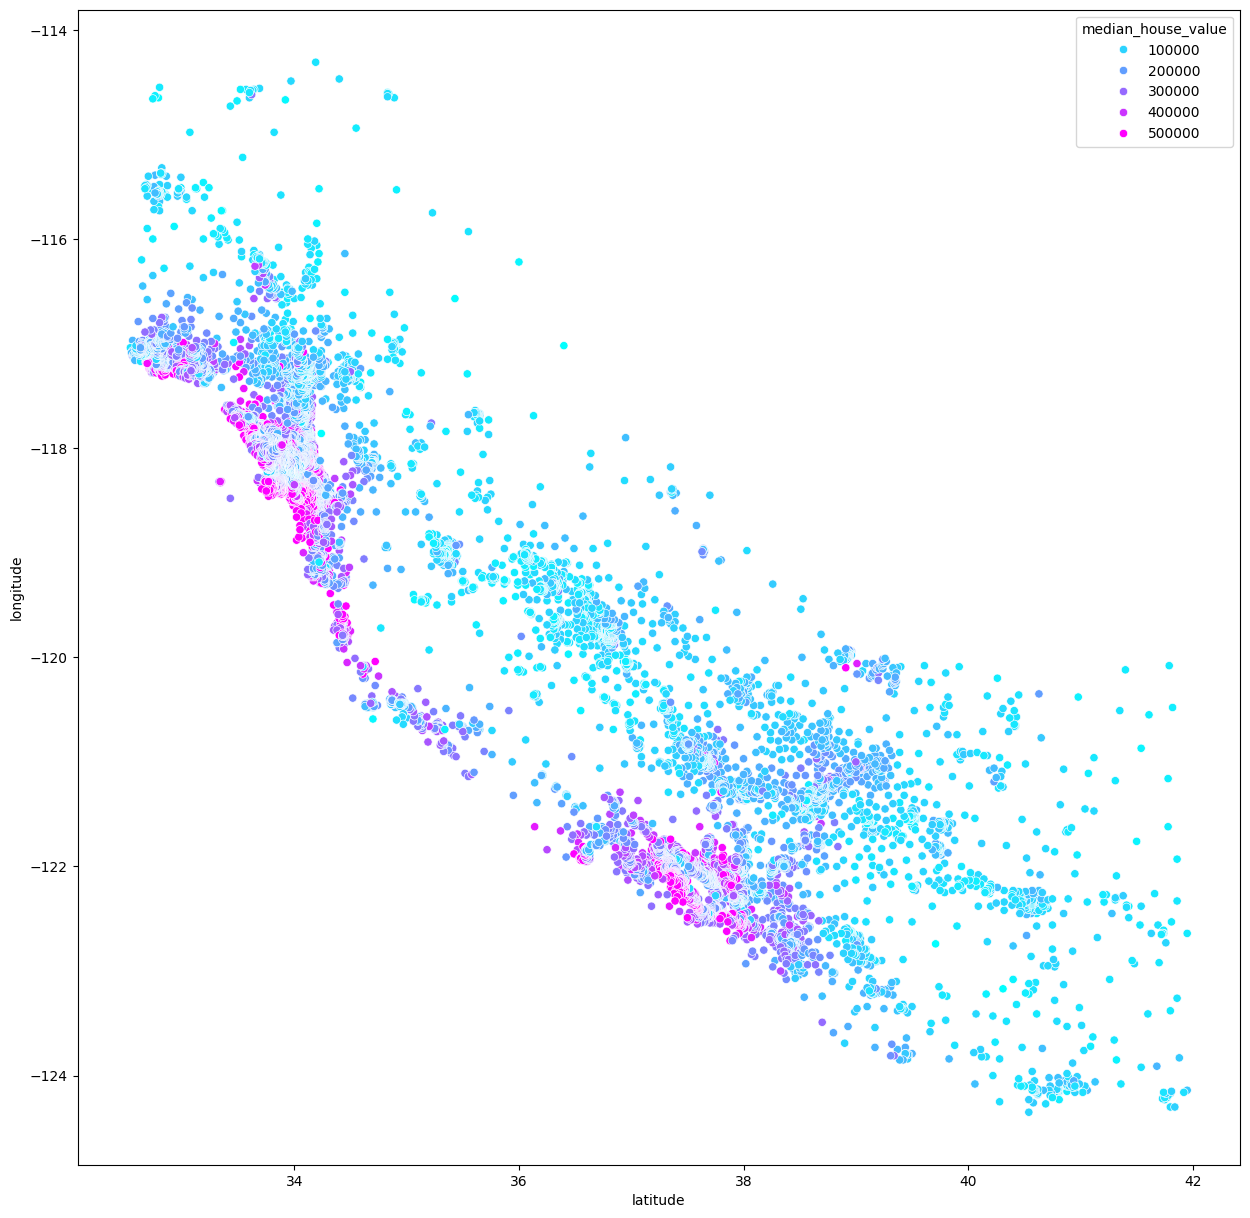

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="latitude" , y ="longitude" ,data = df , hue="median_house_value", palette="cool" )

In [ ]:
# how many roooms are bedrooms and how many households
df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']
df['household_rooms'] = df['total_rooms'] / df['households']
#bedroom -ve corr
# rooms is better than bedroom
#household_rooms corr better with med house val than households

<Axes: >

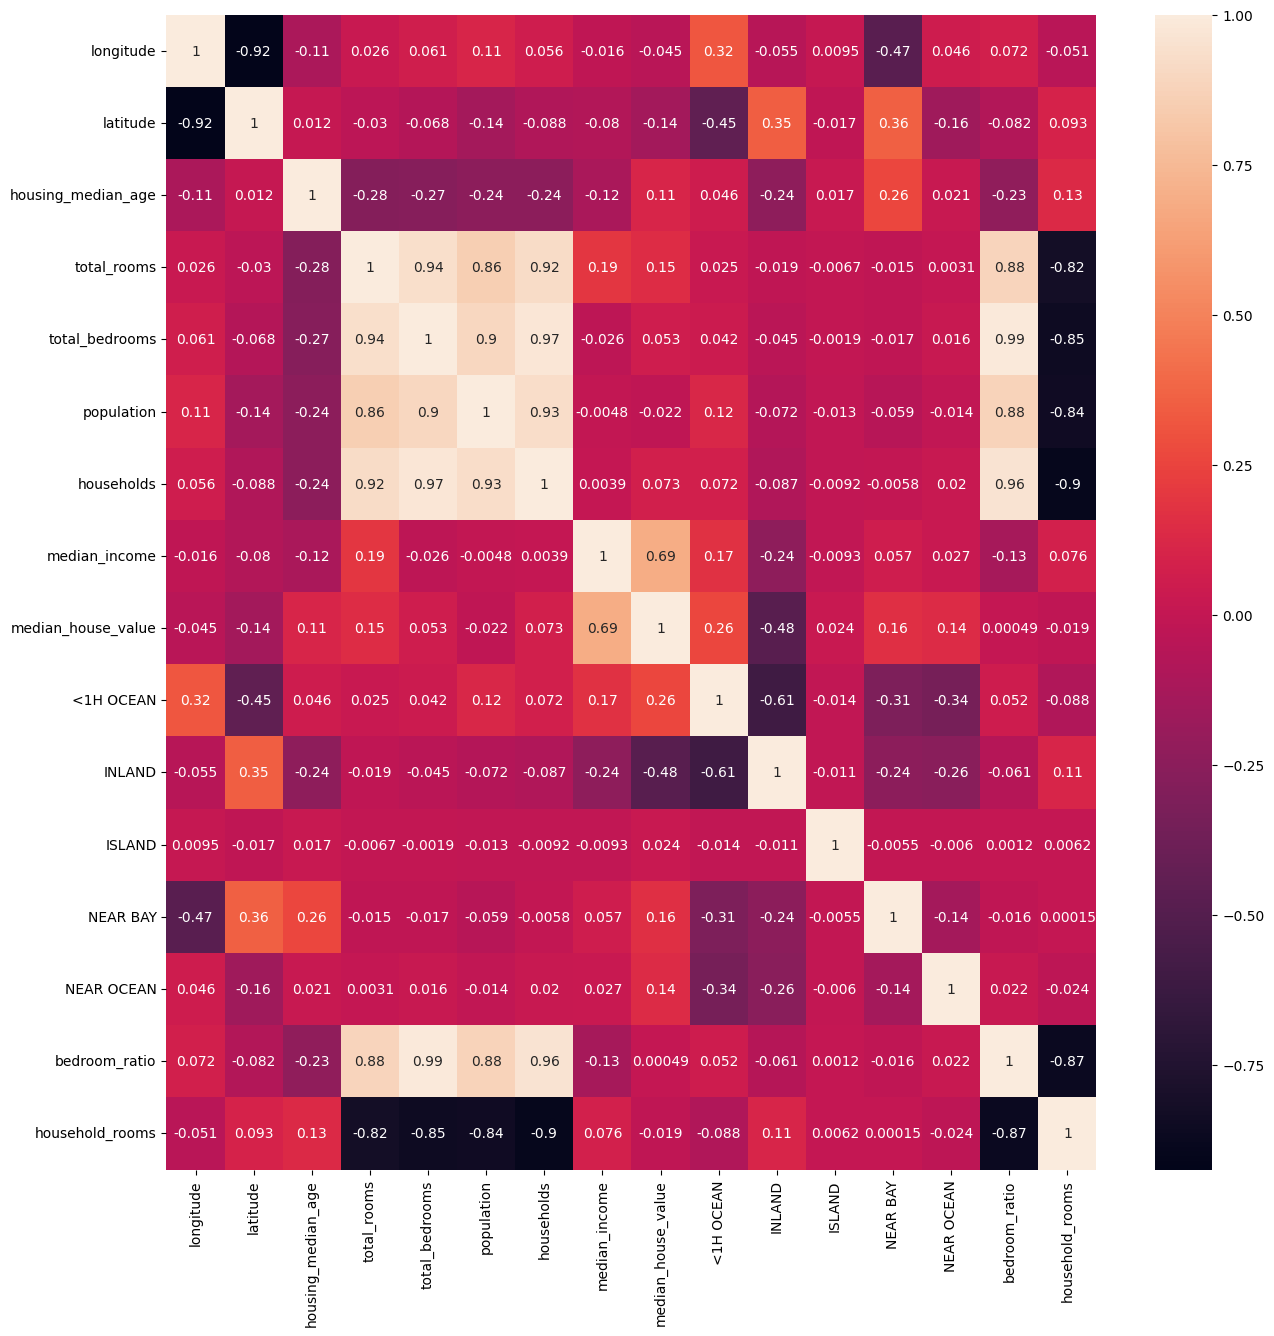

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr() , annot = True)

In [ ]:
def replace_outliers(col):
    Q1, Q3 = col.quantile(0.25), col.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

# Define the columns you want to process
columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'bedroom_ratio', 'household_rooms']

# Loop through columns and replace outliers
for col in columns:
    if df[col].dtype != 'object':
        lower_limit, upper_limit = replace_outliers(df[col])
        df[col] = df[col].clip(lower_limit, upper_limit)
        print(f"Replaced outliers in {col}. Lower limit: {lower_limit}, Upper limit: {upper_limit}")


Replaced outliers in housing_median_age. Lower limit: -10.5, Upper limit: 65.5
Replaced outliers in total_rooms. Lower limit: 1.9799240077763902, Upper limit: 2.3370438940308564
Replaced outliers in total_bedrooms. Lower limit: 4.523494302478338, Upper limit: 7.644128532676636
Replaced outliers in population. Lower limit: 5.496011869852804, Upper limit: 8.625308456533006
Replaced outliers in households. Lower limit: 4.488043986288101, Upper limit: 7.555539141076487
Replaced outliers in median_income. Lower limit: -0.70675, Upper limit: 8.01445
Replaced outliers in bedroom_ratio. Lower limit: 2.2969561136148724, Upper limit: 3.338790704714388
Replaced outliers in household_rooms. Lower limit: 0.2941589817184634, Upper limit: 0.4245863472015677


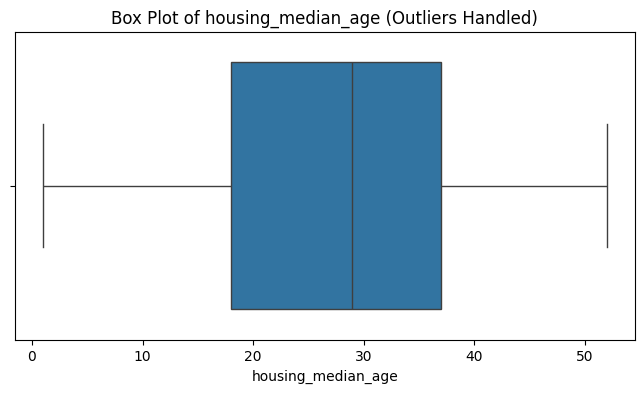

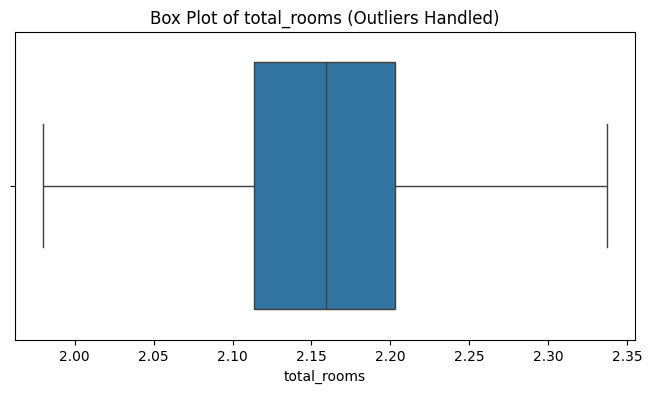

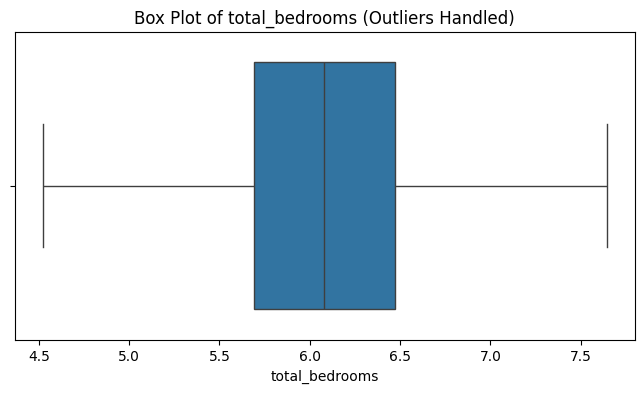

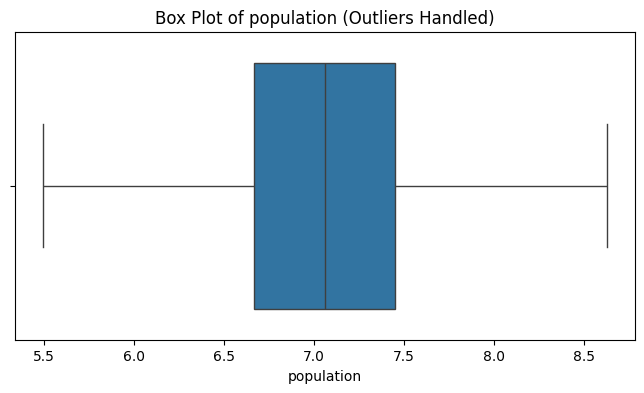

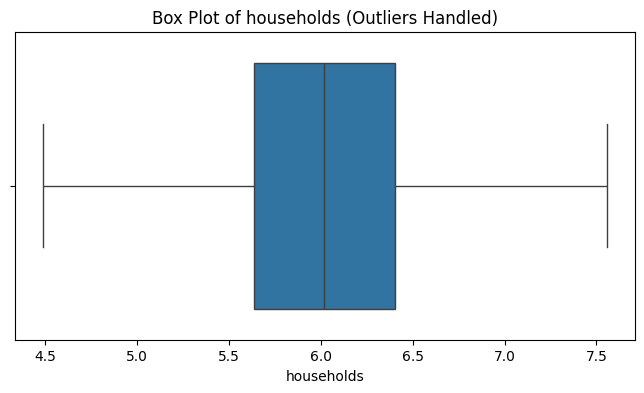

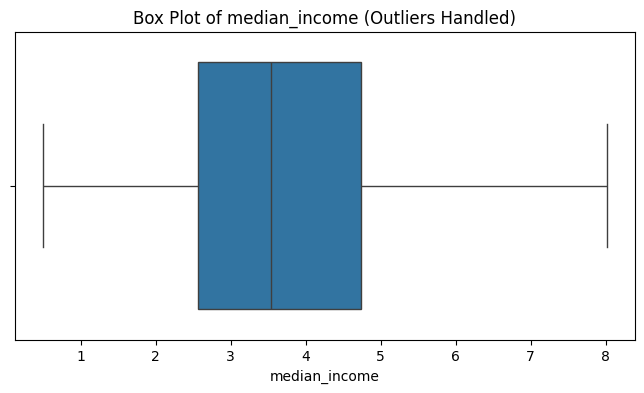

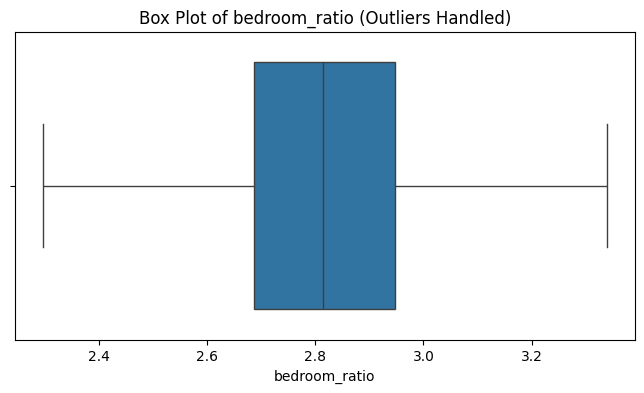

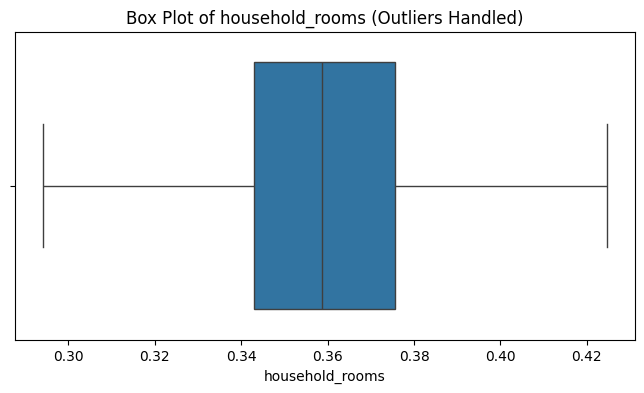

In [ ]:
# Create box plots to visualize outliers after handling
for col in columns:
    if df[col].dtype != 'object':
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col} (Outliers Handled)')
        plt.show()

In [ ]:
columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'bedroom_ratio', 'household_rooms']

# Handle outliers without removing rows
for col in columns:
    # Calculate interquartile range (IQR)
    q25, q75 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q75 - q25

    # Define lower and upper limits for outliers
    lower_limit = q25 - 1.5 * iqr
    upper_limit = q75 + 1.5 * iqr

    # Clip the values to the lower and upper limits
    df[col] = df[col].clip(lower_limit, upper_limit)

    # Print the number of outliers removed
    num_outliers = len(df[(df[col] < lower_limit) | (df[col] > upper_limit)])
    print(f'Replaced outliers in {col}. Number of outliers removed: {num_outliers}')


Replaced outliers in housing_median_age. Number of outliers removed: 0
Replaced outliers in total_rooms. Number of outliers removed: 0
Replaced outliers in total_bedrooms. Number of outliers removed: 0
Replaced outliers in population. Number of outliers removed: 0
Replaced outliers in households. Number of outliers removed: 0
Replaced outliers in median_income. Number of outliers removed: 0
Replaced outliers in bedroom_ratio. Number of outliers removed: 0
Replaced outliers in household_rooms. Number of outliers removed: 0


In [ ]:
#split data
# x independent , y dependent
X = df.drop(['median_house_value'], axis = 1)

y = df ['median_house_value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [ ]:
train = X_train.join(y_train)

In [ ]:
test = X_test.join(y_test)

In [ ]:
train.shape


(16346, 16)

In [ ]:
test.shape

(4087, 16)

In [ ]:
#Simple linear regression

from sklearn.linear_model import LinearRegression


In [ ]:
reg = LinearRegression()

In [ ]:
X_train, y_train = train.drop(['median_house_value'],axis = 1), train['median_house_value']


In [ ]:
X_test, y_test = test.drop(['median_house_value'],axis = 1), test['median_house_value']


In [ ]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18840,-122.64,41.63,19.0,2.187117,6.173786,7.011214,6.066108,3.10620,False,True,False,False,False,2.822797,0.360547
1962,-120.71,38.73,17.0,2.160079,5.983936,6.760415,5.863631,2.92190,False,True,False,False,False,2.770239,0.368386
17764,-121.86,37.35,35.0,2.172463,6.406880,7.542744,6.390241,2.55510,True,False,False,False,False,2.949131,0.339966
2746,-115.57,32.78,29.0,2.169075,5.908083,7.068172,5.888878,4.03750,False,True,False,False,False,2.723780,0.368334
18084,-122.06,37.32,30.0,2.199182,6.293419,7.273093,6.230481,6.21820,True,False,False,False,False,2.861709,0.352971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4322,-118.35,34.08,52.0,2.156916,5.963579,6.812345,5.929589,3.81410,True,False,False,False,False,2.764863,0.363755
4235,-118.31,34.11,52.0,2.144398,5.717028,6.601230,5.683580,5.86590,True,False,False,False,False,2.666030,0.377297
4400,-118.28,34.08,39.0,2.203789,6.799056,7.567863,6.708084,2.87500,True,False,False,False,False,3.085166,0.328527
9164,-118.47,34.42,25.0,2.205896,6.263398,7.475339,6.232448,5.28870,True,False,False,False,False,2.839390,0.353937


In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.score(X_test , y_test)

0.6679396666227484

In [ ]:
 #scaling data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_s = scaler.fit_transform(X_train)
#no need to scale tje output
X_test_s = scaler.transform(X_test)


In [ ]:
reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
reg.score(X_test_s, y_test)

0.6679396666227484

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test , y_test)

0.8112754075220253

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.feature_names_in_ = X_train.columns


In [ ]:
y_pred =reg.predict(X_test)


In [ ]:
#polynomial reggression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [ ]:
poly_reg= PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(X)

In [ ]:
#polynomial features with degree 2
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

# (MSE)
mse = mean_squared_error(y_test, y_pred)

#(R2) score
r2 = r2_score(y_test, y_pred)


print(f'R-squared (R2) Score: {r2:.2f}')


R-squared (R2) Score: 0.67
